# Automate Excel with xlwings

## How does it work?!

![](img/xlwings_frompython_architecture.png)

In [206]:
import xlwings as xw
import numpy as np
import pandas as pd
import datetime as dt
import time
import sys

In [207]:
xw.__version__

'0.24.9'

# The Basics

## xw.view(): Excel as viewer for tabular data

In [3]:
data = np.random.rand(100, 100)
data

array([[0.54794442, 0.79222729, 0.10420932, ..., 0.99396441, 0.68230098,
        0.70011962],
       [0.2929471 , 0.46596405, 0.56443346, ..., 0.67715459, 0.27747511,
        0.63287156],
       [0.85807701, 0.33748358, 0.25603192, ..., 0.85710227, 0.02079325,
        0.64215512],
       ...,
       [0.60013171, 0.85484074, 0.46145815, ..., 0.7895067 , 0.44234152,
        0.02755223],
       [0.45106571, 0.98098327, 0.62693144, ..., 0.06566588, 0.3634928 ,
        0.51856687],
       [0.43392705, 0.06146105, 0.49018914, ..., 0.5785033 , 0.36582608,
        0.03096633]])

In [4]:
# Opens a new book
xw.view(data)

In [5]:
# Reuse an existing sheet (sheets gets cleared with every call)
xw.view(np.random.rand(5, 5), xw.sheets.active)

In [6]:
xw.view(np.random.rand(3, 3), xw.sheets.active)

## Connect to a Book

In [7]:
# Fire up a new book in the active Excel instance
wb1 = xw.Book()

In [16]:
# Connects to an unsaved book (looks in all Excel instances)
wb1 = xw.Book('Book2')

In [9]:
wb1

<Book [Book2]>

In [12]:
# Connects to a book by file name or full path and opens it if it is not open yet
# Windows: Use raw strings for path: r'C:\path\to\file.xlsx'
# Again: looks in all Excel instances

#wb1 = xw.Book('C:\\Users\\MyWorkbook.xlsx')
wb1 = xw.Book('/Users/seansong/Downloads/backtesting.xlsx')

## Sheet object

In [17]:
sheet = wb1.sheets[0]
sheet

<Sheet [Book2]Sheet1>

## The Range object

In [18]:
# Write value
sheet.range('A1').value = 'Hello xlwings!'

In [19]:
# Read value
sheet.range('A1').value

'Hello xlwings!'

In [20]:
# Write the same value to multiple cells
sheet.range('A3:B4').value = 123

In [21]:
# Excel's numerical format is float!
sheet.range('A3').value

123.0

In [22]:
sheet.range('B10').value

In [23]:
# Datetime
sheet.range('A6').value = dt.datetime(2014, 12, 9, 12, 3, 25)
sheet.range('A6').value

datetime.datetime(2014, 12, 9, 12, 3, 25)

In [24]:
# Index notation (1-based like Excel!)
sheet.range((1,1)).value

'Hello xlwings!'

In [26]:
# Formula
sheet.range('B1').formula = '=SUM(A3:B4)'

In [30]:
sheet.range('B1').formula

str

In [31]:
# Named ranges
sheet.range('B1').name = 'test'
sheet.range('test').formula

'=SUM(A3:B4)'

<div class="alert alert-info">

**Named ranges**: Named ranges give you a solid way of reading in values (e.g. parameters) that survive a reorganization of the sheet. The same is true for defining a target cell to write out values.

</div>

In [33]:
test = sheet.range('test').value
test

492.0

In [35]:
sheet.range('B1')

<Range [Book2]Sheet1!$B$1>

In [36]:
sheet.range('test').value = 'Output'

## 2d Ranges

In [40]:
sheet.range('A3:B4').value

[[123.0, 10.0], [112.0, 123.0]]

In [44]:
sheet

<Sheet [Book2]Sheet1>

In [41]:
# Index notation
sheet.range((3,1),(4,2)).value

[[123.0, 10.0], [112.0, 123.0]]

In [45]:
# Assign a nested list to the top-left corner
sheet.range('A9').value = [['a string', 1, 2, 3],
                           [dt.datetime(2010, 1, 1), 123.5, None, None]]

In [47]:
sheet.range('F8').value = np.random.rand(3,3)

In [46]:
# Range expansion: 'table', 'down', 'right'
# Correspond to Ctrl-Shift-down and/or right
# They return a Range object!
sheet.range('A9').expand('table')

<Range [Book2]Sheet1!$A$9:$D$10>

In [53]:
sheet.range('A9').expand()

<Range [Book2]Sheet1!$A$9:$D$10>

In [54]:
# 'table' is default
sheet.range('A9').expand().value

[['a string', 1.0, 2.0, 3.0],
 [datetime.datetime(2010, 1, 1, 0, 0), 123.5, 131.0, None]]

In [56]:
# Use .clear() to also clear the formatting
sheet.range('A9').expand().clear_contents()

## 1d vectors

In [57]:
# Horizontal...
sheet.range('A12').value = [1, 2, 3, 4]

In [58]:
# ... and vertical vectors
sheet.range('A13').options(transpose=True).value = [5, 6, 7, 8]
# this is the same as:
# sheet.range('A13').value = [[5], [6], [7], [8]]


In [59]:
sheet.range('F13').value = [[5],[6],[7],[8]]

In [60]:
sheet.range('A12').expand('right').value

[1.0, 2.0, 3.0, 4.0]

In [63]:
sheet.range('A12').expand('down').value

[1.0, 5.0, 6.0, 7.0, 8.0]

## ndim

In [64]:
sheet.range('A12').options(ndim=2, expand='right').value

[[1.0, 2.0, 3.0, 4.0]]

In [65]:
sheet.range('A12').options(ndim=2, expand='down').value

[[1.0], [5.0], [6.0], [7.0], [8.0]]

In [85]:
sheet.range('A12').options(ndim = 2).expand('down').value

[1.0, 5.0, 6.0, 7.0, 8.0]

## Autofit

In [69]:
# autofit columns and rows based on single Cell
sheet.range('A3').autofit()

In [67]:
# autofit columns based on Range
sheet.range('A1:C3').columns.autofit()

In [68]:
# autofit a whole column
sheet.range('A:A').autofit()

In [78]:
sheet.range('A6').autofit()

## Background color

In [84]:
# Assign an RGB tuple
sheet.range('A1').color = (0, 255,0)
sheet.range('A1').color

(0, 255, 0)

# Range indexing/slicing

In [86]:
rng = sheet.range('A1:D5')
rng[0, 0]

<Range [Book2]Sheet1!$A$1>

In [87]:
rng[1]

<Range [Book2]Sheet1!$B$1>

In [88]:
rng[:, 3:]

<Range [Book2]Sheet1!$D$1:$D$5>

In [89]:
rng[1:3, 1:3]

<Range [Book2]Sheet1!$B$2:$C$3>

In [90]:
xw.books.active.close()

# Full qualification

In [92]:
# Get all availabe PIDs (Process Ids)
xw.apps.keys()

[66049]

In [93]:
# This allows us to specificy a specific Excel instance
pid = xw.apps.keys()[0] # or you could use xw.apps.active.pid

In [94]:
# We start at the app (=Excel instance) and walk our way down to the range
xw.apps[pid].books[0].sheets[0].range('A1')

<Range [Book1]Sheet1!$A$1>

In [100]:
xw.apps[pid].books[0].sheets[0].range('A1').value

0.8572135482564639

In [95]:
# Square brackets behave like in Python, whereas round brackets behave like in Excel:
xw.apps(pid).books(1).sheets(1).range('A1')

<Range [Book1]Sheet1!$A$1>

In [101]:
# Instead of indices we can also use names:
xw.apps[pid].books['Book1'].sheets['Sheet1'].range('A1')
xw.apps(pid).books('Book1').sheets('Sheet1').range('A1')

<Range [Book1]Sheet1!$A$1>

## Work with multiple apps

In [102]:
app1 = xw.apps[pid]
app2 = xw.App()

In [103]:
# Open the same workbook twice in different Excel instances
app1.books.open('timeseries.xlsx')
app2.books.open('timeseries.xlsx')

<Book [timeseries.xlsx]>

In [105]:
xw.apps.keys()

[66049, 67912]

In [106]:
xw.Book('timeseries.xlsx')  # this will throw an error

Exception: Workbook 'timeseries.xlsx' is open in more than one Excel instance.

In [107]:
# The following syntax is *required* if the same file is open in >1 instances (full qualification)
print(app1.books['timeseries.xlsx'])
print(app2.books['timeseries.xlsx'])
print(app1.books['timeseries.xlsx'].app)
print(app2.books['timeseries.xlsx'].app)

<Book [timeseries.xlsx]>
<Book [timeseries.xlsx]>
<Excel App 66049>
<Excel App 67912>


<Book [Book1]>

# Active Objects

In [128]:
# Active app
xw.apps.active

<Excel App 66049>

In [129]:
# active book in active app
xw.books.active

<Book [timeseries.xlsx]>

In [130]:
# active sheet in active book in active app
xw.sheets.active

<Sheet [timeseries.xlsx]Sheet1>

In [131]:
# This is a special shortcut for interactive use only:
# It takes the active sheet from the active book
xw.Range('A1').value

'Date'

In [132]:
app2

<Excel App 67912>

In [133]:
app2.kill()

In [134]:
xw.apps

Apps([<Excel App 66049>])

<div class="alert alert-info">

**Note**: Active objects are meant to be used in interactive use. Don't use them in scripts as this would not be reliable. This is especially true for `xw.Range`. For scripts, always go through a sheet object: `sheet.range(...)`.


</div>

# Sheets

In [137]:
xw.sheets[0].name

'Sheet1'

In [138]:
xw.sheets.count  # or: len(xw.sheets)

1

In [139]:
xw.sheets.add(name='New', after='Sheet1')

<Sheet [timeseries.xlsx]New>

In [144]:
xw.sheets.add(name = 'New2',before = 'New')

<Sheet [timeseries.xlsx]New2>

In [142]:
app1.books

Books([<Book [Book1]>, <Book [timeseries.xlsx]>])

### Range shortcuts: sheet[...]

In [145]:
sheet = xw.sheets[0]
sheet['A1']  # same as: sheet.range('A1')

<Range [timeseries.xlsx]Sheet1!$A$1>

In [146]:
sheet['A1:B5']

<Range [timeseries.xlsx]Sheet1!$A$1:$B$5>

In [147]:
sheet[0, 1]

<Range [timeseries.xlsx]Sheet1!$B$1>

In [148]:
sheet[:10, :10]

<Range [timeseries.xlsx]Sheet1!$A$1:$J$10>

In [153]:
xw.apps

Apps([<Excel App 66049>])

# Excel Charts

In [208]:
wb = xw.Book()
sheet = wb.sheets[0]
sheet.range('A1').value = [['one', 'two'],
                           [1.1, 2.2],
                           [3.3, None]]

In [170]:
app1.books

Books([<Book [Book1]>, <Book [timeseries.xlsx]>])

In [209]:
chart = sheet.charts.add()
chart.set_source_data(sheet.range('A1').expand())
chart.chart_type = 'line'
chart.top = sheet.range('A5').top

In [210]:
chart.chart_type = 'bar_clustered'

In [211]:
# available chart types (we're only printing the first 10 here)
xw.constants.chart_types[:50]

('3d_area',
 '3d_area_stacked',
 '3d_area_stacked_100',
 '3d_bar_clustered',
 '3d_bar_stacked',
 '3d_bar_stacked_100',
 '3d_column',
 '3d_column_clustered',
 '3d_column_stacked',
 '3d_column_stacked_100',
 '3d_line',
 '3d_pie',
 '3d_pie_exploded',
 'area',
 'area_stacked',
 'area_stacked_100',
 'bar_clustered',
 'bar_of_pie',
 'bar_stacked',
 'bar_stacked_100',
 'bubble',
 'bubble_3d_effect',
 'column_clustered',
 'column_stacked',
 'column_stacked_100',
 'combination',
 'cone_bar_clustered',
 'cone_bar_stacked',
 'cone_bar_stacked_100',
 'cone_col',
 'cone_col_clustered',
 'cone_col_stacked',
 'cone_col_stacked_100',
 'cylinder_bar_clustered',
 'cylinder_bar_stacked',
 'cylinder_bar_stacked_100',
 'cylinder_col',
 'cylinder_col_clustered',
 'cylinder_col_stacked',
 'cylinder_col_stacked_100',
 'doughnut',
 'doughnut_exploded',
 'line',
 'line_markers',
 'line_markers_stacked',
 'line_markers_stacked_100',
 'line_stacked',
 'line_stacked_100',
 'pie',
 'pie_exploded')

In [212]:
wb.close()

# Matplotlib

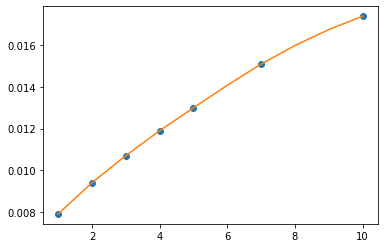

In [213]:
%matplotlib inline
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib

# Swap rate example
years = [1, 2, 3, 4, 5, 7, 10]
swap_rate = [0.0079, 0.0094, 0.0107, 0.0119,
             0.013, 0.0151, 0.0174]
years_new = np.linspace(1, 10, num=10)
interpolate = interp1d(years, swap_rate, kind='quadratic')

fig = plt.figure(figsize=(6, 4))
swaprate_plot = plt.plot(years, swap_rate, 'o',
                         years_new, interpolate(years_new), '-')

In [214]:
wb = xw.Book()
sheet = wb.sheets[0]

In [215]:
plot = sheet.pictures.add(fig, name='SwapRate', update=True)

In [216]:
# Fine Tuning
width, height = fig.get_size_inches()
dpi = fig.get_dpi()
sheet.pictures.add(fig, name='SwapRate2', update=True,
                   left=sheet.range('A25').left, top=sheet.range('A25').top,
                   width=width * dpi / 2, height=height * dpi / 2)

<Picture 'SwapRate2' in <Sheet [Book2]Sheet1>>

In [217]:
# Alternatively manipulate properties after adding the picture
plot.height = plot.height / 2
plot.width = plot.width / 2

In [184]:
wb.close()

<div class="alert alert-info">

**Note**: If you set `update=True`, you can resize and position the plot on Excel: subsequent calls to `pictures.add()` with the same name  will update the picture without changing its position or size.


</div>

# Table objects

Excel Table objects aren't officially supported yet, but reading actually works nicely:

In [185]:
# The sample book has a table that was created with:
# Insert > Table (incl. Header Row and Total Row)
wb = xw.Book('table_objects.xlsx')
sheet = wb.sheets[0]

In [186]:
# Get entire table body - no different from named range
sheet.range('Table1').value

[['DAX', 'DAX', 10366.53],
 ['SPX', 'S&P 500', 2100.8],
 ['DJI', 'Dow Jones IA', 18053.6]]

In [187]:
# Get column data 
sheet.range('Table1[Symbol]').value

['DAX', 'SPX', 'DJI']

In [188]:
# Get column including header and total rows
sheet.range('Table1[[#All], [Last]]').value

['Last', 10366.53, 2100.8, 18053.6, 30520.93]

In [189]:
# Get header row for one column
sheet.range('Table1[[#Headers], [Last]]').value

'Last'

In [190]:
# Total row for one column
sheet.range('Table1[[#Totals], [Last]]').value

30520.93

In [191]:
# Two or more adjancent columns
sheet.range('Table1[[Index]:[Last]]').value

[['DAX', 10366.53], ['S&P 500', 2100.8], ['Dow Jones IA', 18053.6]]

In [192]:
wb.close()

# Efficiency

<div class="alert alert-info">

**Watch out**: Minimize your cross-application calls to improve efficiency, i.e. if possible, always read and write 2d ranges instead of single cells: `sht.range('A1').value = [[1,2],[3,4]]` instead of `sheet.range('A1').value = 1`, `sheet.range('B1').value = 2` etc. 

</div>

In [193]:
wb = xw.Book()
sheet = wb.sheets[0]

In [194]:
# This calls each cell individually - Don't do this!
for i, cell in enumerate(sheet.range('A1:E30')):
    cell.value = i

In [195]:
sheet.range('A1').expand().clear()

In [196]:
# Do this instead
import numpy as np
sheet.range('A1').value = np.arange(5 * 30).reshape((30, 5))

In [197]:
wb.close()


# Workaround for missing features: Manipulate the underlying object

In [198]:
wb = xw.Book()
sheet = wb.sheets[0]

In [201]:
# On Windows, the underlying object is a pywin32 COM object
# On Mac, the underlying object is an appscript object

sheet.range('A1').api  # same for the other objects

app(pid=66049).workbooks['Book8'].worksheets[1].cells['A1']

## E.g. Range.ClearFormats() is not implemented yet

In [202]:
sheet.range('A10').value = 1
sheet.range('A10').color = (255, 0, 0)

In [203]:
# Code that makes use of the api property will be platform dependent (!)
if sys.platform.startswith('darwin'):
    # Mac version (appscript syntax)
    sheet.range('A10').api.clear_formats()
elif sys.platform.startswith('win'):
    # Windows version (pywin32 syntax)
    sheet.range('A10').api.ClearFormats()

# Calling VBA macros

Paste the following code into a VBA module:
```
Function MySum(x, y)
    MySum = x + y
End Function
```
Then run you can call it from Python:

In [204]:
wb = xw.books.active
my_sum = wb.macro('MySum')
my_sum(1, 2)

3